<a href="https://colab.research.google.com/github/SimoRega/ProgettoDataIntensive/blob/main/ProgettoDataIntensiveRega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
ciao

# **Descrizione del Problema**
Il dataset scelto per questo progetto è stato reperito da kaggle, di seguito il link.

https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021

Questo dataset include tutte le canzoni che sono entrate nella classifica settimanale Top 200 su Spotify negli anni 2020-2021.

L'obiettivo del progetto è quello di predire una variabile discreta binaria "Top100Chart" con la quale definire se una canzone ha le potenzialità per entrare in una classifica (Sarebbe stato interessante fare una Top10Chart ma non erano presenti abbastanza dati su cui allenare il modello poichè le canzoni entrate in Top10 nel dataset sono solo l'8.5%, quindi mi sono basato su una Top100Chart come vedremo dopo).


In [2]:
#importo il dataset automaticamente dal mio google drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True);
with open('/content/drive/My Drive/Colab Notebooks/spotify_dataset.csv') as f:
  spotify_raw_data=pd.read_csv(f,index_col=0)


Mounted at /content/drive/


Diamo un piccolo sguardo a come si presenta il nostro Dataset allo stato grezzo senza alcuna manipolazione o modifica

In [3]:
spotify_raw_data.head(10)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",2021-03-31,...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",2021-04-09,...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",2021-05-20,...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",2021-06-04,...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db


Di seguito possiamo vedere i dati del nostro DataFrame, il tipo delle features, gli eventuali valori nulli e lo spazio di occupazione in memoria

In [4]:
spotify_raw_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Song Name                  1556 non-null   object
 4   Streams                    1556 non-null   object
 5   Artist                     1556 non-null   object
 6   Artist Followers           1556 non-null   object
 7   Song ID                    1556 non-null   object
 8   Genre                      1556 non-null   object
 9   Release Date               1556 non-null   object
 10  Weeks Charted              1556 non-null   object
 11  Popularity                 1556 non-null   object
 12  Danceability               1556 non-null   object
 13  Energy                     1556 non-null   object
 14  Loudness

#Normalizzazione

1.   **Pulizia del Dataset:** Scelgo di fare una fase preliminare di pulizia del mio DataSet per rendere i dati più utilizzabili e comprensibili in modo da farne poi un analisi sui dati molto più approfondita.
Procedo a pulire tuple vuote e features non utili.

2.   **Standardizzazione**: cerco di discretizzare tutte le mie variabili. Farò sicuramente un cambiamento alle features Artist e Genre





## Pulizia del DataSet


In [7]:
#Ho notato purtroppo che sono presenti tuple con campi contenenti solo stringe vuote, quindi procedo a pulirle traformandole in NaN per poi eliminarle
spotify_raw_data.replace(' ', np.nan, inplace=True)
spotify_raw_data.dropna(inplace=True)

In [8]:
#Piccolo controllo per accettarsi che io abbia effettivamente pulito le tuple a NaN
spotify_raw_data.isna().sum()

Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [9]:
spotify_raw_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1545 non-null   int64 
 1   Number of Times Charted    1545 non-null   int64 
 2   Week of Highest Charting   1545 non-null   object
 3   Song Name                  1545 non-null   object
 4   Streams                    1545 non-null   object
 5   Artist                     1545 non-null   object
 6   Artist Followers           1545 non-null   object
 7   Song ID                    1545 non-null   object
 8   Genre                      1545 non-null   object
 9   Release Date               1545 non-null   object
 10  Weeks Charted              1545 non-null   object
 11  Popularity                 1545 non-null   object
 12  Danceability               1545 non-null   object
 13  Energy                     1545 non-null   object
 14  Loudness

Creo la mia feature **`Top100Chart`** che vado a popolare con *True* se ha raggiunto una posizione in classifica minore o uguale a 100, con *False* altrimenti.



In [10]:
top_chart= [x<=100 for x in spotify_raw_data["Highest Charting Position"]]
spotify_raw_data["Top100Chart"]=top_chart

Pulizia delle Features che non mi sono utili o di intralcio rimuovo le features che dipendono esclusivamente dal tempo di uscita della canzone poichè andrebbero a sporcare il mio training, in quanto sono dati che dipendono dalla maturazione della canzone sulla piattaforma di ascolto nel tempo, cosa che non ha una canzone nuova; non posso comparare ad esempio gli Streams di una canzone uscita da 2 mesi ad una che appena uscita dove le Streams saranno sicuramente 0

FEATURES RIMOSSE: 
* Song ID: non è utile al training
* Weeks Charted: sarebbe = a 0 in una canzone nuova
* Week of Highest Charting: sarebbe = a 0 in una canzone nuova
* Number of Times Charted:
* Release Date: 
* Streams:
*Highest Charting Position

In [11]:
spotify_clean_data=spotify_raw_data.drop(["Song ID","Weeks Charted","Week of Highest Charting","Number of Times Charted","Release Date","Streams","Highest Charting Position","Popularity"], axis=1)

In [12]:
#Rinomino la Feature "Duration (ms)" in "Duration" in modo da essere più utilizzabile ed esteticamente più simile alle altre features
spotify_clean_data.rename(columns={"Duration (ms)" : "Duration"}, inplace=True);

In [13]:
spotify_clean_data.head()

,Song Name,Artist,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration,Valence,Chord,Top100Chart
Index,,,,,,,,,,,,,,,
1,Beggin',Måneskin,3377762,"['indie rock italiano', 'italian pop']",0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,True
2,STAY (with Justin Bieber),The Kid LAROI,2230022,['australian hip hop'],0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,True
3,good 4 u,Olivia Rodrigo,6266514,['pop'],0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,True
4,Bad Habits,Ed Sheeran,83293380,"['pop', 'uk pop']",0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,True
5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,True


Significato delle features 


*   **`Artist Followers`** : n° di followers che l'artista ha su Spotify
*   **`Energy`** : valore da 0 a 1, rappresenta una misura percettiva di intensità e attività. Una canzone con un valore di Energy prossimo ad 1, è veloce, rumorosa e con un volume alto. 
*   **`Loudness`** : il volume complessivo di una traccia in decibel. I valori vengono calcolati in media sull'intera traccia e vanno da -60 a 0 db.
*   **`Speechiness`** : valore da 0 a 1. Si basa sulla presenza di parole nella traccia; più la registrazione è esclusivamente vocale più il valore si avvicina ad 1.
*   **`Acousticness`** : valore da 0 a 1. Indica quanto la traccia è acustica; più elementi acustici sono presenti invece di elementi elettronici più il valore si avvicina a 1.
*   **`Danceability`** : valore da 0 a 1. Descrive quanto sia adatta la base della canzone per essere ballata.
*   **`Liveness`** : valore da 0 a 1. Rileva la presenza di un pubblico nella registrazione. Valori di liveness più alti rappresentano una maggiore probabilità che la traccia sia stata eseguita dal vivo.
*   **`Tempo`** : rappresenta il ritmo complessivo stimato di una traccia musicale in battiti al minuto (BPM).
*   **`Duration`** : rappresenta la durata del brano in millisecondi
*   **`Valence`** : valore da 0 a 1. Descrive la positività musicale trasmessa da un brano. Un brano con Valence alta è più positivo (ad es. è felice, allegro, euforico) mentre quelli con Valence più bassa sono più negativi (ad es. tristi, depressi)
*   **`Chord`** : l'accordo principale della canzone
*   **`Top100Chart`** : valore True o False. Se il brano è salito in classifica nelle prime 100 posizioni



##Standardizzazione

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy import stats
import math
import ast

In [15]:
spotify_data = spotify_clean_data.copy()

**Discretizzazione degli Artisti**

Ritengo che gli Artisti possano essere una feature utile ed interessante, quindi tolgo la colonna "Artist" che al momento è un array di array di stringhe e procedo a creare una colonna nel mio dataframe (feature) per ogni artista, la quale verrà poi popolata da 1 se la canzone corrispondente è cantata da quell'artista, 0 altrimenti

In [16]:
#Estrapolo tutti gli Artisti e li aggiungo ad un set in modo che siano unici e distinti
artists=set()
for names in set(spotify_clean_data["Artist"].values):
  tmp=names.split(", ")
  for a in tmp:
    artists.add(a)


In [17]:
#Creo una matrice di zeri m*n con m=lunghezza tuple dataset e n=numero di artisti
zeros_placeholders=np.zeros((len(spotify_clean_data['Song Name']),len(artists)))

#Successivamente creo un dataframe temporaneo che ha come valori la matrice di zeri precedentemente creata e
#come intestazioni delle colonne il set degli artisti
artists_to_merge=pd.DataFrame(zeros_placeholders, columns=artists, dtype=int)

In [18]:
#Unisco il dataframe appena creato le cui features sono i singoli artisti al mio dataframe iniziale
artists_merged=pd.concat([artists_to_merge, spotify_clean_data["Song Name"]],axis=1)
artists_merged.dropna(inplace=True)

In [19]:
#Procedo a popolare la parte della matrice di zeri appena unita, guardo le colonne appena unite e cerco il
#match con gli artisti presenti nella vecchia colonna Artist
#
#    Legenda: 1 vuol dire che la canzone X viene cantata dall'artista Y
#              0 vuol dire che la canzone X non viene cantata dall'artista Y
#
for song in spotify_clean_data.values:
  tmp=song[1].split(", ")
  for tmp_artist in tmp:
    spotify_clean_data.loc[spotify_clean_data["Song Name"]==song[0],tmp_artist]=1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [20]:
spotify_clean_data.fillna(0)

,Song Name,Artist,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,...,Gambi,Maes,Sheck Wes,French Montana,Lexa,Gradur,Heuss L'enfoiré,Dadá Boladão,Tati Zaqui,OIK
Index,,,,,,,,,,,,,,,,,,,,,
1,Beggin',Måneskin,3377762,"['indie rock italiano', 'italian pop']",0.714,0.8,-4.808,0.0504,0.127,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,STAY (with Justin Bieber),The Kid LAROI,2230022,['australian hip hop'],0.591,0.764,-5.484,0.0483,0.0383,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,good 4 u,Olivia Rodrigo,6266514,['pop'],0.563,0.664,-5.044,0.154,0.335,0.0849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bad Habits,Ed Sheeran,83293380,"['pop', 'uk pop']",0.808,0.897,-3.712,0.0348,0.0469,0.364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",0.736,0.704,-7.409,0.0615,0.0203,0.0501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,New Rules,Dua Lipa,27167675,"['dance pop', 'pop', 'uk pop']",0.762,0.7,-6.021,0.0694,0.00261,0.153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,"['sertanejo', 'sertanejo universitario']",0.528,0.87,-3.123,0.0851,0.24,0.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,Havana (feat. Young Thug),Camila Cabello,22698747,"['dance pop', 'electropop', 'pop', 'post-teen ...",0.765,0.523,-4.333,0.03,0.184,0.132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Come per gli artisti estrapolo tutti i generi musicali e li aggiungo ad un set in modo che siano unici e distinti
genres=set()
for x in spotify_raw_data["Genre"].values:
  for j in ast.literal_eval(x):
    genres.add(j)

In [22]:
#Creo una matrice di zeri m*n con m=lunghezza tuple dataset e n=numero di generi musicali
zeros_placeholders_genres=np.zeros((len(spotify_clean_data.values),len(genres)))

#Successivamente creo un dataframe temporaneo che ha come valori la matrice di zeri precedentemente creata e
#come intestazioni delle colonne il set dei generi
genres_to_merge=pd.DataFrame(zeros_placeholders_genres, columns=genres, dtype=int)

In [23]:
#Unisco il mio dataframe principale con il dataframe temporaneo dei generi musicali ed elimino eventuali campi NaN generati dal merge
genres_merged=pd.concat([genres_to_merge, spotify_clean_data["Song Name"]],axis=1)
genres_merged.dropna(inplace=True)

In [24]:
#Unisco il mio dataframe principale con il dataframe temporaneo dei generi musicali ed elimino eventuali campi NaN generati dal merge
#tmp_spotify_data=pd.merge(spotify_clean_data, artists_merged ,left_on="Song Name", right_on="Song Name",how='outer')
#spotify_data=pd.merge(spotify_clean_data, artists_merged,left_on="Song Name", right_on="Song Name",how='inner')
#spotify_data.dropna(inplace=True)

In [25]:
#Procedo a popolare la parte della matrice di zeri appena unita, guardo le colonne appena unite e cerco il
#match con i generi presenti nella vecchia colonna Genre
#
#    Legenda: 1 vuol dire che la canzone X è del genere musicale Y
#              0 vuol dire che la canzone X non è del genere musicale Y

for song in spotify_clean_data.values:
  tmp=ast.literal_eval(song[3])
  for genre in tmp:
    spotify_clean_data.loc[spotify_clean_data["Song Name"]==song[0],genre]=1

In [26]:
spotify_clean_data.fillna(0,inplace=True)

In [27]:
#Faccio un controllo conoscendo già la canzone e il cantante per vedere se la cella corrispondente è valorizzata ad 1
spotify_clean_data.loc[spotify_clean_data["Song Name"]=="STAY (with Justin Bieber)","The Kid LAROI"]

Index
2    1.0
Name: The Kid LAROI, dtype: float64

In [28]:
spotify_clean_data.loc[spotify_clean_data["Song Name"]=="STAY (with Justin Bieber)","The Kid LAROI"]

Index
2    1.0
Name: The Kid LAROI, dtype: float64

In [29]:
#Faccio un'altro controllo sulla stessa canzone con il suo genere musicale
#spotify_clean_data.loc[spotify_clean_data["Song Name"]=="STAY (with Justin Bieber)","australian hip hop"]

In [30]:
ArtistTopCharted=dict()
for a in artists:
  ArtistTopCharted[a]=spotify_clean_data[a].sum()

In [31]:
spotify_clean_data["Artists Times Top Charted"]=np.zeros(len(spotify_clean_data["Song Name"]),dtype=int)

In [32]:
for song in spotify_clean_data.values:
  tmp_s=song[0]
  for tmp_a in song[1].split(", "):
    flag = spotify_clean_data.loc[spotify_clean_data["Song Name"]==tmp_s,tmp_a].values[0]
    #print("{} {} {}".format(flag,tmp_a,tmp_s))
    if flag==1:
      tmp_cell = spotify_clean_data.loc[spotify_clean_data["Song Name"]==tmp_s,"Artists Times Top Charted"].values[0]
      if tmp_cell==0:
        spotify_clean_data.loc[spotify_clean_data["Song Name"]==tmp_s,"Artists Times Top Charted"]=ArtistTopCharted[tmp_a]
      else:
        spotify_clean_data.loc[spotify_clean_data["Song Name"]==tmp_s,"Artists Times Top Charted"]=tmp_cell+ArtistTopCharted[tmp_a]

In [33]:
tmp_series=spotify_clean_data["Artists Times Top Charted"]

In [34]:
spotify_data["Artists Times Top Charted"]=tmp_series

#Analisi dei Dati

In [35]:
data_to_describe=spotify_data.drop(['Top100Chart',"Song Name","Genre","Chord","Artist","Artist Followers"], axis=1)

data_to_describe.astype(float).describe()


,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration,Valence,Artists Times Top Charted
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704,16.276375
std,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326,17.134318
min,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000,1.000000
25%,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000,3.000000
50%,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000,9.000000
75%,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000,25.000000
max,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000,107.000000


Come possiamo vedere dalla funzione **`describe`** possiamo vedere come sono distribuiti i nostri dati; sono tutti distribuiti uniformemente intorno la loro media ad eccezione di ***Tempo*** e ***Duration***.

Non credo che queste due features possano comunque alterare l'elaborazione di un modello poichè su circa 1500 valori penso sia normale che features con un divario così ampio di valori tra MAX e MIN, soprattutto se parliamo di durata di una canzone o del suo ritmo, infatti la canzone più breve nel dataset dura 30 sec mentre la più lunga circa 9 minuti.

In [36]:
top_chart_10= [x<=10 for x in spotify_raw_data["Highest Charting Position"]]
top_chart_50= [x<=50 for x in spotify_raw_data["Highest Charting Position"]]


Calcolo sul momento le features Top50Chart e Top10Chart

In [37]:
palette_pie_chart=['#7F7','#F77']

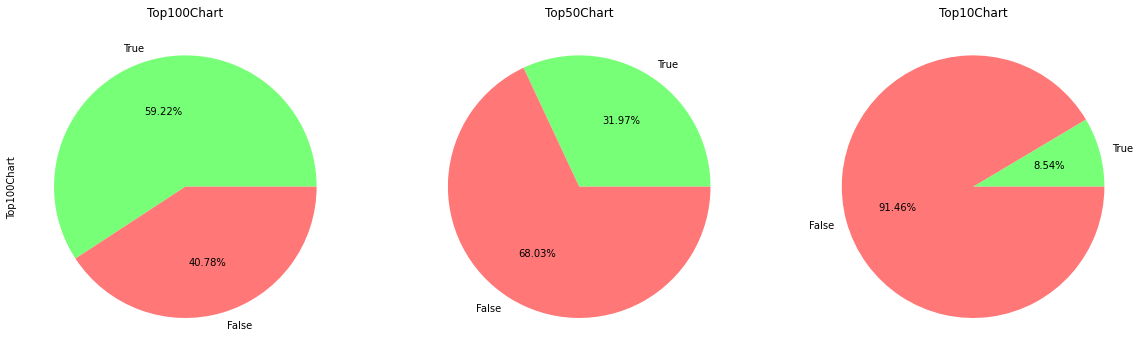

In [38]:
plt.figure(figsize =(20, 12));

plt.subplot(1,3,1);
spotify_data['Top100Chart'].value_counts().plot.pie(autopct='%1.2f%%',colors=palette_pie_chart);
plt.title("Top100Chart");

plt.subplot(1,3,2);
plt.pie([top_chart_50.count(True),top_chart_50.count(False)],autopct='%1.2f%%',labels=["True","False"],colors=palette_pie_chart);
plt.title("Top50Chart");

plt.subplot(1,3,3);
plt.pie([top_chart_10.count(True),top_chart_10.count(False)],autopct='%1.2f%%',labels=["True","False"],colors=palette_pie_chart);
plt.title("Top10Chart");

Purtroppo la **`Top10Chart`** sarebbe stata molto interessante ma non vi erano abbastanza dati, ho provato con la **`Top50Chart`** ma i modelli non hanno prodotto poi un risultato soddisfacente (di seguito i risultati) :

* Perceptron            0.46516614026994096
* Logistic Regression   0.44606861763724504
* RandomForest          0.04390019933257183
* Decision Tree         0.3837457296588011

La **`Top100Chart`** mi sembra quindi l'unica opzione guardando i dati e il grafico, con circa il 60% di valori a *True*




  
  
 



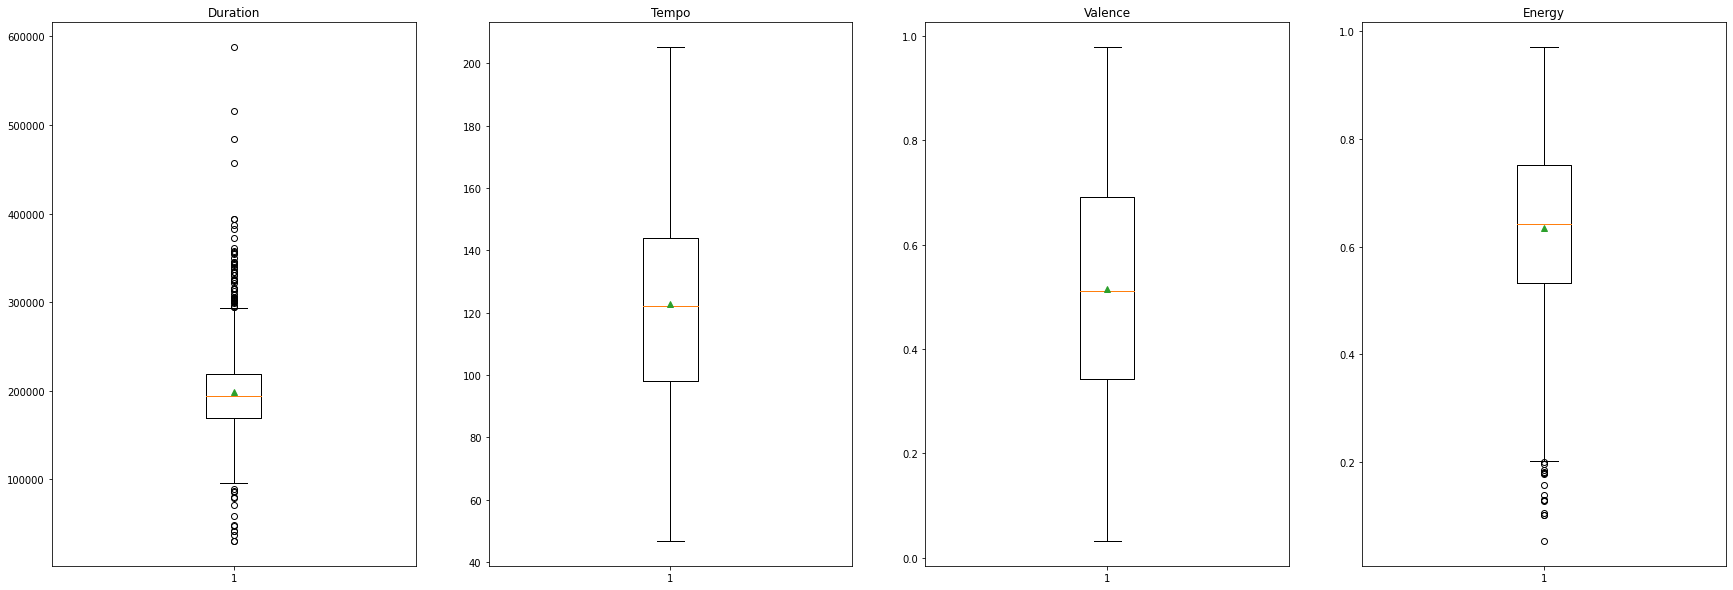

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize=(30, 10))

axes[0].boxplot([float(x) for x in spotify_data["Duration"]], showmeans=True)
axes[1].boxplot([float(x) for x in spotify_data["Tempo"]], showmeans=True)
axes[2].boxplot([float(x) for x in spotify_data["Valence"]], showmeans=True)
axes[3].boxplot([float(x) for x in spotify_data["Energy"]], showmeans=True)

axes[0].set_title("Duration");
axes[1].set_title("Tempo");
axes[2].set_title("Valence");
axes[3].set_title("Energy");


I dati che ritroviamo da questi Boxplot sono interessanti: a mio parere **`Duration`**, **`Tempo`**, **`Valence`** e **`Energy`** sono le feature che possono di più influenzare il modello.

Però da quanto possiamo vedere **`Tempo`** e **`Valence`** sono distribuiti abbastanza uniformemente; mentre per **`Energy`** abbiamo qualche valore anomalo e per **`Duration`** notiamo una maggiore concentrazione di outliers composta dai valori più piccoli dell'insieme. 

In [40]:
import seaborn as sns

from matplotlib import rcParams

In [41]:
def plot_correlation(dataset):
    cmap = sns.diverging_palette(220, 10, as_cmap=True);
    # Generate a mask for the upper triangle
    mask = np.zeros_like(dataset, dtype=bool);
    mask[np.triu_indices_from(mask)] = True;

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataset, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [42]:
heatmap=spotify_data.drop(["Song Name","Genre","Chord","Artist"],axis=1)
heatmap.dropna(inplace=True)

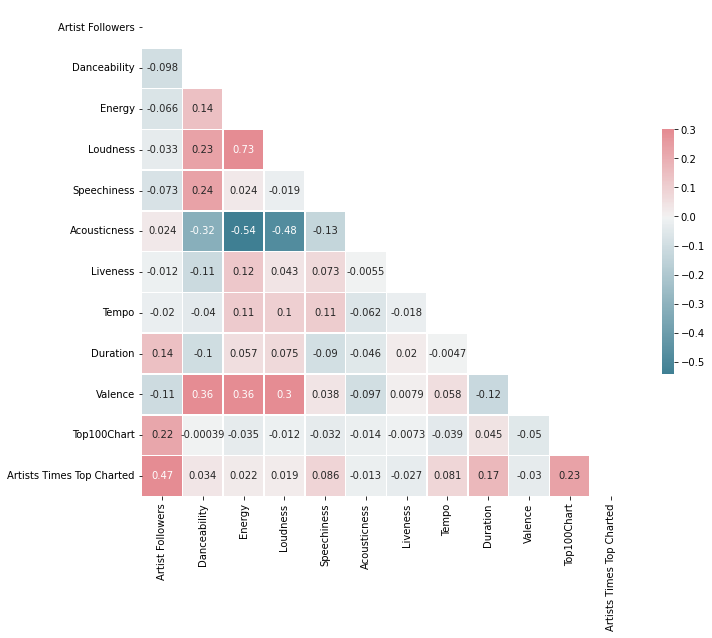

In [43]:
plot_correlation(heatmap.astype(float).corr());

Da questo grafico possiamo capire meglio qualche correlazione : 

*   **`Loudness`** & **`Energy`** : ovviamente come ci si poteva aspettare la feature che misura il valore in db della traccia è strettamente collegata alla feature che misura quanto più una traccia è energica, vivace e rumorosa.
*   **`Valence`** & **`Danceability`**, **`Energy`**, **`Loudness`** : da questo grafico possiamo notare come le canzoni che hanno più valenza, ovvero che trasmettono più positività, sono in media canzoni molto energiche, rumorose e su cui ci si può ballare.
*   **`Acousticness`** & **`Energy`** : da questa correlazione si evince che più un brano è acustico e meno sarà vivace ed energico, bensì sarà più tranquillo.
*   **`Top100Chart`** vs **`Artist Followers`** : vediamo come i followers di un artista influenzino lievemente una canzone in Top 100. Quindi ci aspettiamo che una nuova canzone di un artista con tanti followers abbia più possibilità di entrare nella Top 100 rispetto ad una canzone di un artista con pochi followers.
Dalle analisi precedenti mi aspettavo forse una correlazione più evidente tra la **`Top100Chart`** il **`Tempo`** e la **`Duration`**, probabilmente questo è causa di una correlazione non diretta tra le varie features.



#Modellazione

In [44]:
X = spotify_data.drop(['Top100Chart',"Song Name","Genre","Chord","Artist"], axis=1)
y = spotify_data['Top100Chart']

In [45]:
y=y.astype('int')

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=43, stratify=y.values)

In [47]:
X_train.head()

,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration,Valence,Artists Times Top Charted
Index,,,,,,,,,,,
874,1255573,0.954,0.696,-7.117,0.204,0.00576,0.0754,100.036,139413,0.432,3
131,409173,0.682,0.873,-4.163,0.0449,0.402,0.0946,150.006,147072,0.964,3
75,27116,0.727,0.681,-7.114,0.0265,0.00214,0.0861,123.028,241970,0.448,1
366,3126961,0.83,0.748,-5.362,0.162,0.354,0.0992,133.028,177443,0.523,7
129,6266514,0.638,0.259,-10.706,0.0898,0.753,0.219,88.485,202827,0.269,12


In [48]:
std_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron())
])

std_model.fit(X_train,y_train)
print("R-squared coefficient: {:.5}".format(std_model.score(X_val, y_val)))


R-squared coefficient: 0.53664


In [49]:
pd.set_option('display.max_rows', None)  
first_check_influence=pd.Series(std_model["model"].coef_[0], index=X_train.columns)
first_check_influence

Artist Followers            -0.873331
Danceability                 1.355756
Energy                      -0.867770
Loudness                    -2.611474
Speechiness                 -0.045718
Acousticness                -3.690821
Liveness                     2.247973
Tempo                       -0.524084
Duration                     0.158579
Valence                      0.647731
Artists Times Top Charted    0.933729
dtype: float64

In [50]:
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(3, shuffle=True, random_state=42)

Di seguito verranno testati diversi modelli di classificazione.

Tramite Grid Search e StratifiedKFold sono generati 4 modelli differenti in grado di stimare gli iperparametri e permettere il calcolo dell'accuratezza dei modelli studiati.

In [52]:
from sklearn.model_selection import KFold, StratifiedKFold
skf = StratifiedKFold(3, shuffle=True, random_state=42)

###Perceptron

In [53]:
models = {}


from sklearn.model_selection import GridSearchCV
from sklearn import metrics

std_perceptron = Pipeline([
    ('std', None),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = [
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["l2", "l1"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "perceptron__penalty": ["elasticnet"],
        'perceptron__alpha': [0.0001, 0.001, 0.01, 1, 10],
        'perceptron__l1_ratio':np.linspace(0,1,5)

    }
]

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=skf, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)

score = perceptron_cv.score(X_val, y_val)

print("Best cross validation score: {}\n".format(perceptron_cv.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(perceptron_cv.best_params_))

models["Perceptron"] = {"Model": perceptron_cv.best_estimator_, "Score": perceptron_cv.best_score_}



Best cross validation score: 0.7415052494122193

             Test set score: 0.6864686468646864

                Best params: {'perceptron__alpha': 0.01, 'perceptron__l1_ratio': 0.25, 'perceptron__penalty': 'elasticnet', 'std': None}



In [54]:
pd.Series(perceptron_cv.best_estimator_[1].coef_[0], index=X_train.columns,)

Artist Followers             1.394290e+05
Danceability                -7.176581e+00
Energy                      -5.763462e+00
Loudness                     6.097322e+01
Speechiness                 -1.746417e+00
Acousticness                -2.318586e+00
Liveness                    -1.931535e+00
Tempo                       -1.184819e+03
Duration                    -2.164034e+06
Valence                     -2.994839e+00
Artists Times Top Charted    9.664454e+01
dtype: float64

In [55]:
pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41       189
           1       0.63      0.76      0.69       275

    accuracy                           0.59       464
   macro avg       0.56      0.55      0.55       464
weighted avg       0.57      0.59      0.57       464



###Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(solver="saga"))
])


parameters = [
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["none"]
    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.linspace(0.1, 0.4, 5),

    },
    {
        "std": [None, StandardScaler()],
        "lr__penalty": ["elasticnet"],
        "lr__C": np.linspace(0.1, 0.4, 5),
        "lr__l1_ratio":  [0.1,0.2,0.5,1],
    }
]



lr_gs = GridSearchCV(std_lr, parameters,cv=skf, n_jobs=-1, return_train_score=False, scoring='f1')
lr_gs.fit(X_train, y_train)


score = lr_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(lr_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(lr_gs.best_params_))

models["Logistic Regression"] = {"Model": lr_gs.best_estimator_, "Score": lr_gs.best_score_}


Best cross validation score: 0.731617973451451

             Test set score: 0.7308781869688384

                Best params: {'lr__penalty': 'none', 'std': None}



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [57]:
pred = lr_gs.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.48      0.08      0.14       189
           1       0.60      0.94      0.73       275

    accuracy                           0.59       464
   macro avg       0.54      0.51      0.44       464
weighted avg       0.55      0.59      0.49       464



In [58]:
pd.Series(lr_gs.best_estimator_[1].coef_[0], index=X_train.columns)

Artist Followers             2.987012e-08
Danceability                -4.346578e-14
Energy                      -2.462774e-13
Loudness                    -2.271581e-14
Speechiness                 -4.954320e-14
Acousticness                -1.351903e-13
Liveness                    -1.208264e-13
Tempo                       -3.005001e-11
Duration                    -4.607103e-08
Valence                     -2.017046e-13
Artists Times Top Charted    3.921069e-11
dtype: float64

###Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200, 300],
    'rfc__max_depth': [2, 4, 6, 8, 10],
    'rfc__min_samples_leaf': [2,2,10],
    'rfc__min_samples_split': [2,10,20],
}
    

rfc_gs = GridSearchCV(rfc, parameters, cv=skf, n_jobs=-1, return_train_score=True, scoring='f1')
rfc_gs.fit(X_train, y_train)

score = rfc_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(rfc_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(rfc_gs.best_params_))

models["RandomForest"] = {"Model": rfc_gs.best_estimator_, "Score": rfc_gs.best_score_}


Best cross validation score: 0.7411930748091381

             Test set score: 0.7363770250368189

                Best params: {'rfc__max_depth': 2, 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 100}



In [60]:
pred = rfc_gs.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.58      0.19      0.28       189
           1       0.62      0.91      0.74       275

    accuracy                           0.61       464
   macro avg       0.60      0.55      0.51       464
weighted avg       0.60      0.61      0.55       464



In [61]:
pd.Series(rfc_gs.best_estimator_[1].feature_importances_, index=X_train.columns)

Artist Followers             0.192897
Danceability                 0.117546
Energy                       0.065265
Loudness                     0.106590
Speechiness                  0.028687
Acousticness                 0.006680
Liveness                     0.021336
Tempo                        0.021438
Duration                     0.026322
Valence                      0.034197
Artists Times Top Charted    0.379042
dtype: float64

###Decision Tree

In [62]:
tree_model = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(random_state=42))
])

tree_grid = {"scaler": [None, StandardScaler()],
             'tree__max_depth': [i for i in range(2, 7)]
             }

tree_gs = GridSearchCV(tree_model, tree_grid, cv=skf, n_jobs=-1, return_train_score=True, scoring='f1')
tree_gs.fit(X_train, y_train)

score = tree_gs.score(X_val, y_val)

print("Best cross validation score: {}\n".format(tree_gs.best_score_))
print("             Test set score: {}\n".format(score))
print("                Best params: {}\n".format(tree_gs.best_params_))


models["Decision Tree"] = {"Model": tree_gs.best_estimator_, "Score": tree_gs.best_score_}


Best cross validation score: 0.6956234259019292

             Test set score: 0.7118110236220472

                Best params: {'scaler': None, 'tree__max_depth': 2}



In [63]:
pred = tree_gs.predict(X_val)

print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.38       189
           1       0.63      0.82      0.71       275

    accuracy                           0.61       464
   macro avg       0.58      0.56      0.54       464
weighted avg       0.59      0.61      0.57       464



In [64]:
pd.Series(tree_gs.best_estimator_[1].feature_importances_, index=X_train.columns)

Artist Followers             0.000000
Danceability                 0.221989
Energy                       0.000000
Loudness                     0.000000
Speechiness                  0.000000
Acousticness                 0.000000
Liveness                     0.000000
Tempo                        0.000000
Duration                     0.000000
Valence                      0.000000
Artists Times Top Charted    0.778011
dtype: float64

### Confronto con modello casuale

In [65]:
from sklearn.dummy import DummyClassifier

Viene creato un modello casuale

In [66]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)

random_score = random.score(X_val, y_val)
models["Dummy"] = {"Model" : random, "Score": random_score}

#Riepilogo Accuratezza dei Modelli

In [67]:
from tabulate import tabulate
model_name=list()
model_score=list()
[[model_name.append(name),model_score.append(model["Score"])] for name,model in models.items()];

print(tabulate([model_name,model_score]))

------------------  -------------------  ------------------  ------------------  ------------------
Perceptron          Logistic Regression  RandomForest        Decision Tree       Dummy
0.7415052494122193  0.731617973451451    0.7411930748091381  0.6956234259019292  0.4698275862068966
------------------  -------------------  ------------------  ------------------  ------------------


#Valutazione dei modelli di classificazione

L'accuratezza non è una buona stima della capacità predittiva di un modello di classificazione, in particolare nei casi in cui il dataset è sbilanciato, perchè contiene maggiori record appartenenti ad una classe.

##Precision, Recall, F1-Score

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Costruisco una matrice di confusione per ogni modello creato in precedenza, calcolando la *Precisione*, la *Recall* e l' *F1-Score*.

In [69]:
def calculate_precision_recall_f1(name, X, y) :
    model = models[name]
    y_pred = model["Model"].predict(X)
    
    model["Precision"] = precision_score(y, y_pred)
    model["Recall"] = recall_score(y, y_pred)
    model["F1_Score"] = f1_score(y, y_pred, average="macro")
    print("<< {} >> \n \
                              Confusion matrix: \n      {}\n\n \
           Precision       : {}\n \
           Recall          : {}\n \
           F1 Score (macro): {}\n\n\n \
----------------------------------------------------------------".format(name, 
                                 pd.DataFrame(confusion_matrix(y, y_pred), index=classes, columns=classes), 
                                 model["Precision"], 
                                 model["Recall"], 
                                 model["F1_Score"]))

In [70]:
classes = ["NonInClassifica" , "Top100Chart"]
for name, model in models.items():
    calculate_precision_recall_f1(name, X_val, y_val)

<< Perceptron >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifica               66          123
Top100Chart                   67          208

            Precision       : 0.6283987915407855
            Recall          : 0.7563636363636363
            F1 Score (macro): 0.5482032675317221


 ----------------------------------------------------------------
<< Logistic Regression >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifica               16          173
Top100Chart                   17          258

            Precision       : 0.5986078886310905
            Recall          : 0.9381818181818182
            F1 Score (macro): 0.4375111655564913


 ----------------------------------------------------------------
<< RandomForest >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifi

##Confronto modelli con intervalli di confidenza

In [71]:
#Verifichiamo con confidenza al 95% se la F1-Score dei modelli non è statisticamente più significativa una dall'altra.

def difference_between_two_models(error1, error2, confidence):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

lre_error = 1 - models["Logistic Regression"]["F1_Score"]
tree_error = 1 - models["Decision Tree"]["F1_Score"]
forest_error = 1 - models["RandomForest"]["F1_Score"]
per_error = 1 - models["Perceptron"]["F1_Score"]


print("RandomForest vs Logistic Regression , intervallo di confidenza:")
difference_between_two_models(forest_error, lre_error, 0.95)

print("RandomForest vs Decision Tree , intervallo di confidenza:")
difference_between_two_models(forest_error, tree_error, 0.95)

print("Logistic Regression vs Decision Tree , intervallo di confidenza:")
difference_between_two_models(lre_error, tree_error, 0.95)

print("RandomForest vs Perceptron , intervallo di confidenza:")
difference_between_two_models(forest_error, per_error, 0.95)

RandomForest vs Logistic Regression , intervallo di confidenza:
Valore minimo: 0.01746003723552348
Valore massimo: 0.1250191546802807

RandomForest vs Decision Tree , intervallo di confidenza:
Valore minimo: -0.019019933122505397
Valore massimo: 0.08875605487617545

Logistic Regression vs Decision Tree , intervallo di confidenza:
Valore minimo: 0.05242718050239855
Valore massimo: 0.15978813316707566

RandomForest vs Perceptron , intervallo di confidenza:
Valore minimo: -0.014412708687219687
Valore massimo: 0.09331772072187719



In [72]:
calculate_precision_recall_f1("Dummy", X_val, y_val)

difference_between_two_models(1 - models["RandomForest"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Logistic Regression"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Perceptron"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

difference_between_two_models(1 - models["Decision Tree"]["F1_Score"], 1 - models["Dummy"]["F1_Score"], 0.99)

<< Dummy >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifica               84          105
Top100Chart                  141          134

            Precision       : 0.5606694560669456
            Recall          : 0.48727272727272725
            F1 Score (macro): 0.463598939829696


 ----------------------------------------------------------------
Valore minimo: -0.031107177697899738
Valore massimo: 0.12141082106729441

Valore minimo: -0.04987789960831934
Valore massimo: 0.10205344815472883

Valore minimo: 0.008517356426539113
Valore massimo: 0.16069129897751305

Valore minimo: 0.0039006536197266767
Valore massimo: 0.15613911150333804



A seguito di queste considerazioni, gli unici modelli che statisticamente sono migiori di un modello Dummy casuale sono quelli basati su Perceptron e Decision Tree

In [74]:
calculate_precision_recall_f1("Perceptron", X_val, y_val)
calculate_precision_recall_f1("Decision Tree", X_val, y_val)

<< Perceptron >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifica               66          123
Top100Chart                   67          208

            Precision       : 0.6283987915407855
            Recall          : 0.7563636363636363
            F1 Score (macro): 0.5482032675317221


 ----------------------------------------------------------------
<< Decision Tree >> 
                               Confusion matrix: 
                       NonInClassifica  Top100Chart
NonInClassifica               55          134
Top100Chart                   49          226

            Precision       : 0.6277777777777778
            Recall          : 0.8218181818181818
            F1 Score (macro): 0.5436188223912284


 ----------------------------------------------------------------
